In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Path to the dataset folder
data_path = '/content/drive/My Drive/Collab Dataset/Stocks'

# List all files in the folder to confirm access
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['ADANIPORTS.csv']


In [3]:
import pandas as pd

dataset_file = os.path.join(data_path, 'ADANIPORTS.csv')
df = pd.read_csv(dataset_file)
print(df.head())

         Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.set_index('Date', inplace=True)

In [7]:
print("Missing values in dataset:", df.isnull().sum())

Missing values in dataset: Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64


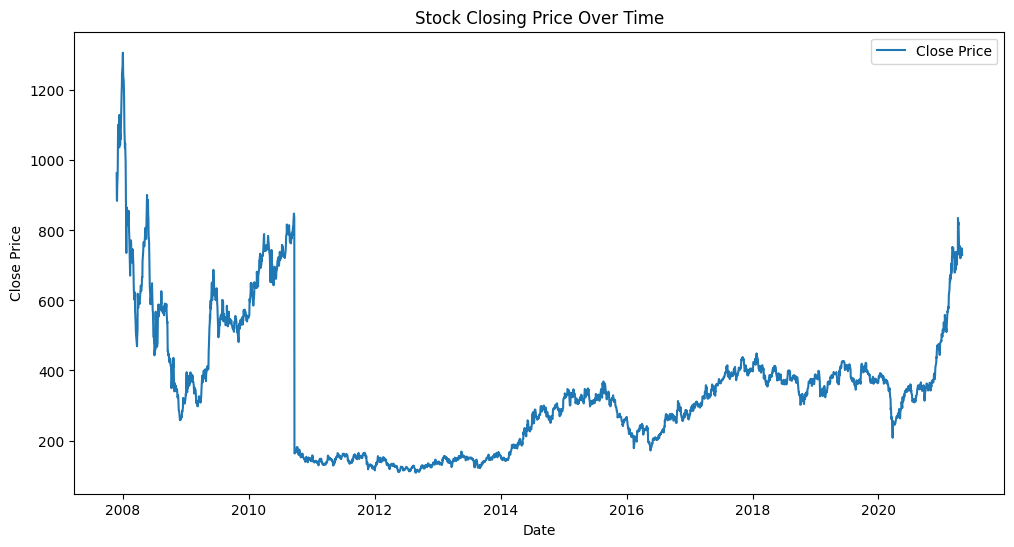

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

<ipython-input-23-6fe42b38d452>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Close'].resample('M').mean()  # Resample data by month and calculate mean


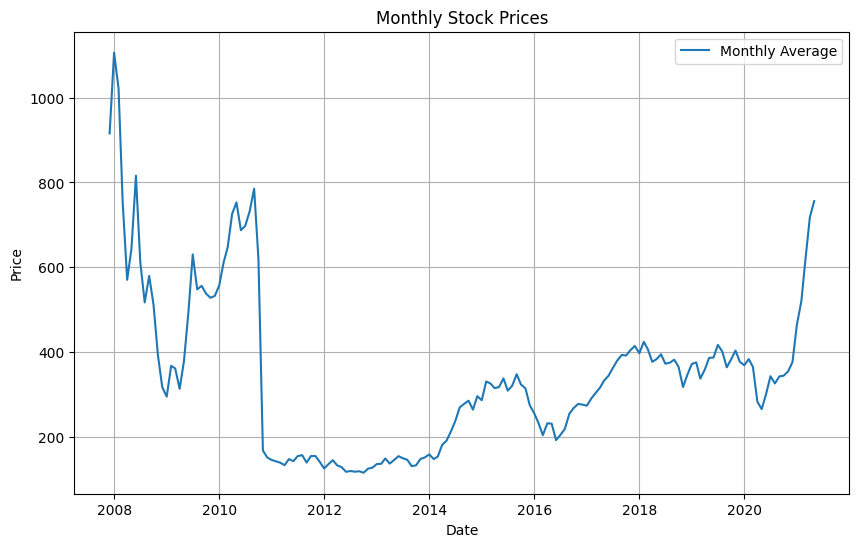

In [23]:
monthly_data = df['Close'].resample('M').mean()  # Resample data by month and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data, label='Monthly Average')
plt.title('Monthly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


<ipython-input-24-9281f4834ed9>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_data = df['Close'].resample('Y').mean()  # Resample data by year and calculate mean


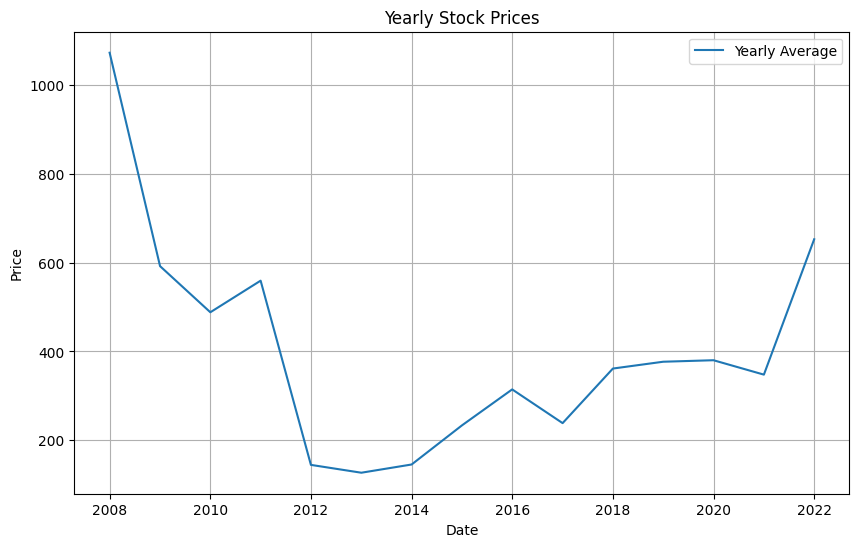

In [24]:
# Plot Yearly Data
yearly_data = df['Close'].resample('Y').mean()  # Resample data by year and calculate mean
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data, label='Yearly Average')
plt.title('Yearly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [25]:
df['30_day_MA'] = df['Close'].rolling(window=30).mean()
df['100_day_MA'] = df['Close'].rolling(window=100).mean()


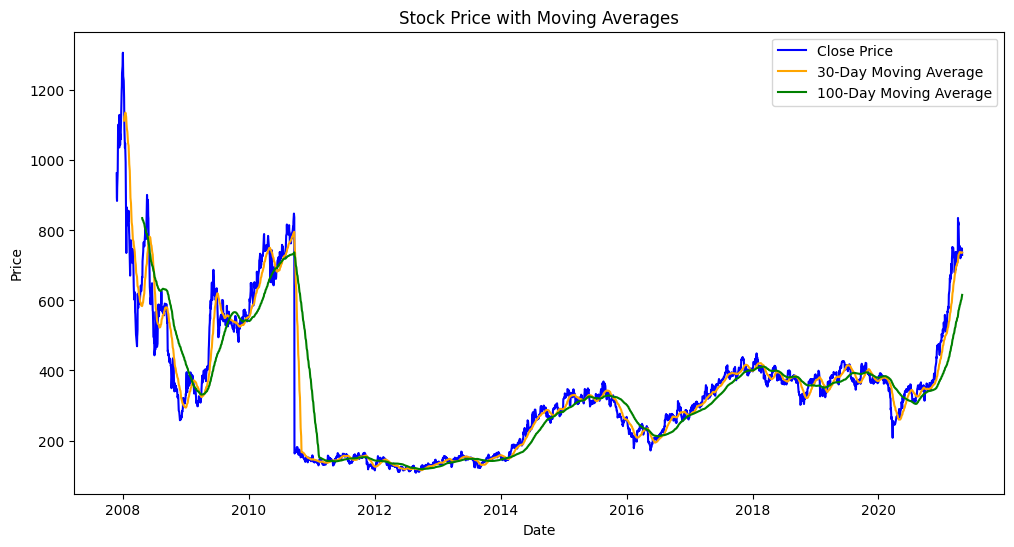

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['30_day_MA'], label='30-Day Moving Average', color='orange')
plt.plot(df['100_day_MA'], label='100-Day Moving Average', color='green')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


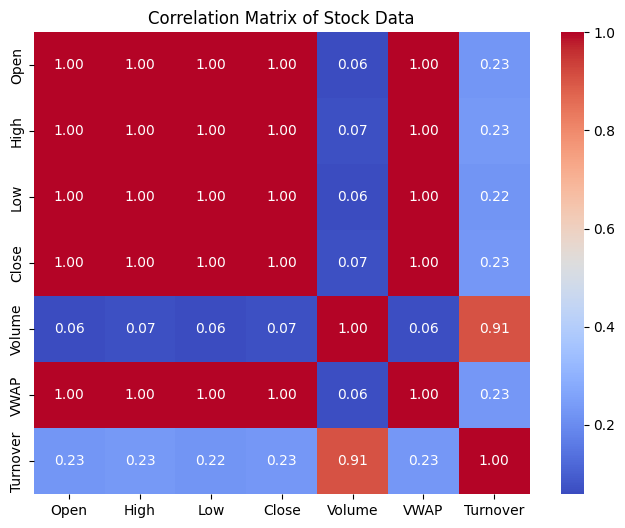

In [28]:
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume', 'VWAP', 'Turnover']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Stock Data')
plt.show()


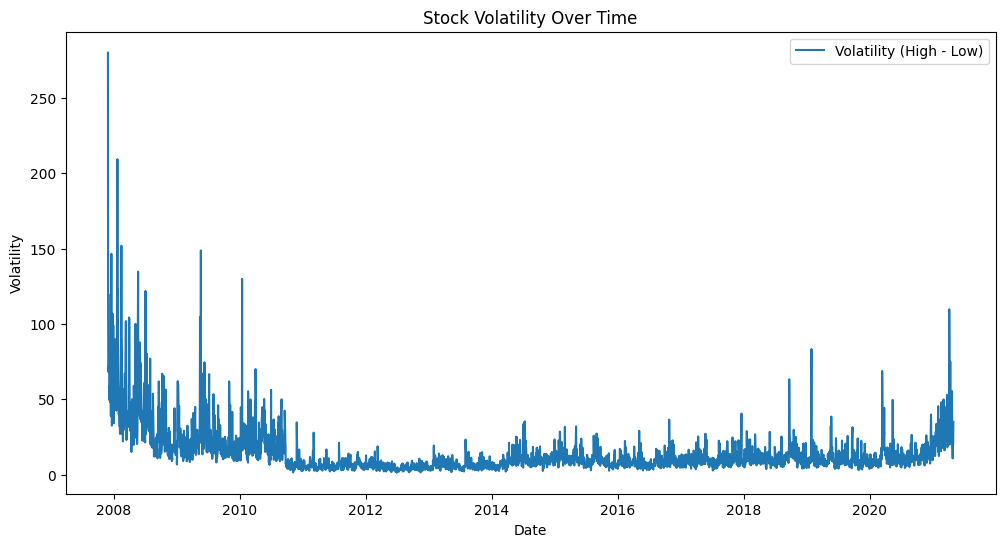

In [29]:
df['Volatility'] = df['High'] - df['Low']

plt.figure(figsize=(12, 6))
plt.plot(df['Volatility'], label='Volatility (High - Low)')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


In [30]:
df['Pct_Change'] = df['Close'].pct_change() * 100


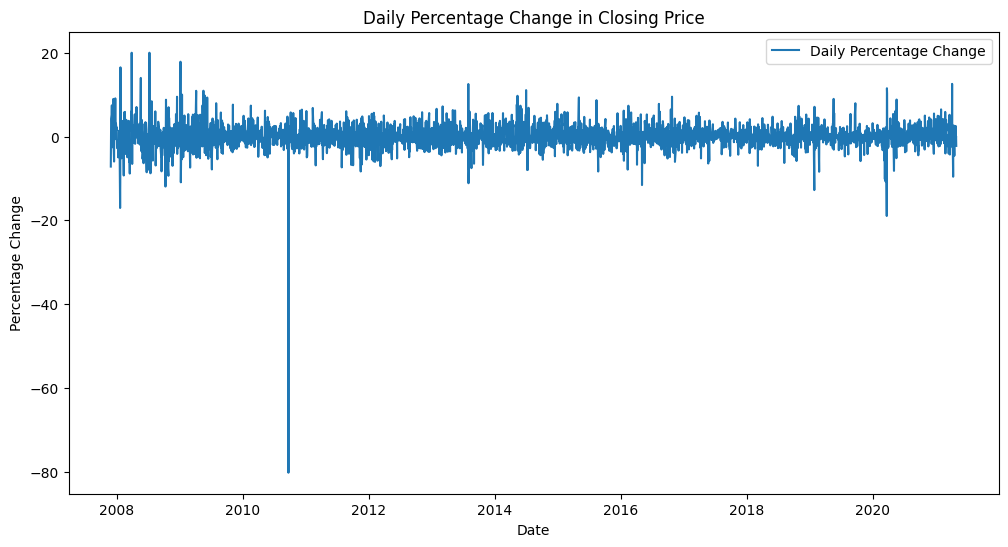

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Pct_Change'], label='Daily Percentage Change')
plt.title('Daily Percentage Change in Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()


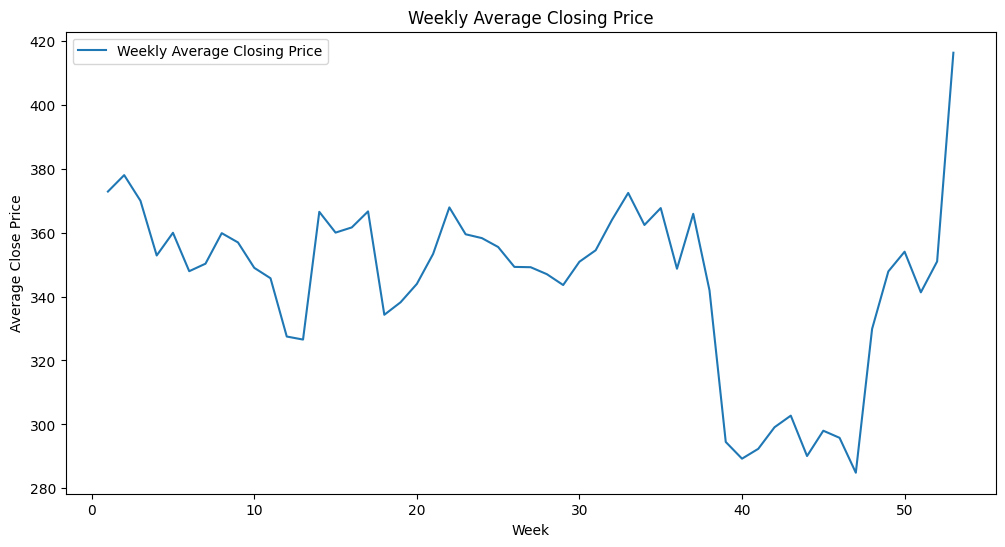

In [15]:
df['Week'] = df.index.isocalendar().week
weekly_avg = df.groupby('Week')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_avg, label='Weekly Average Closing Price')
plt.title('Weekly Average Closing Price')
plt.xlabel('Week')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

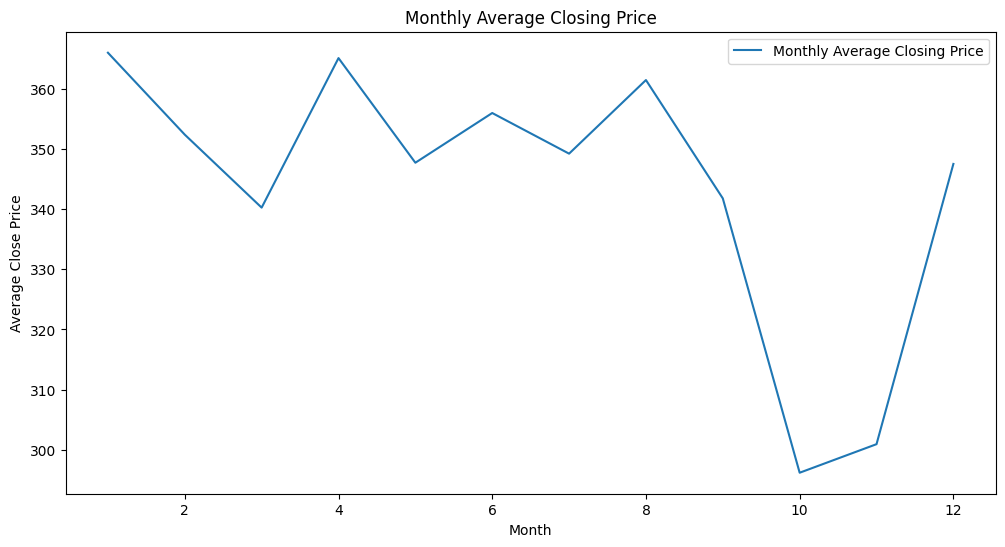

In [17]:
df['Month'] = df.index.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_avg, label='Monthly Average Closing Price')
plt.title('Monthly Average Closing Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.legend()
plt.show()

<ipython-input-38-944dd05c883f>:3: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-38-944dd05c883f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')


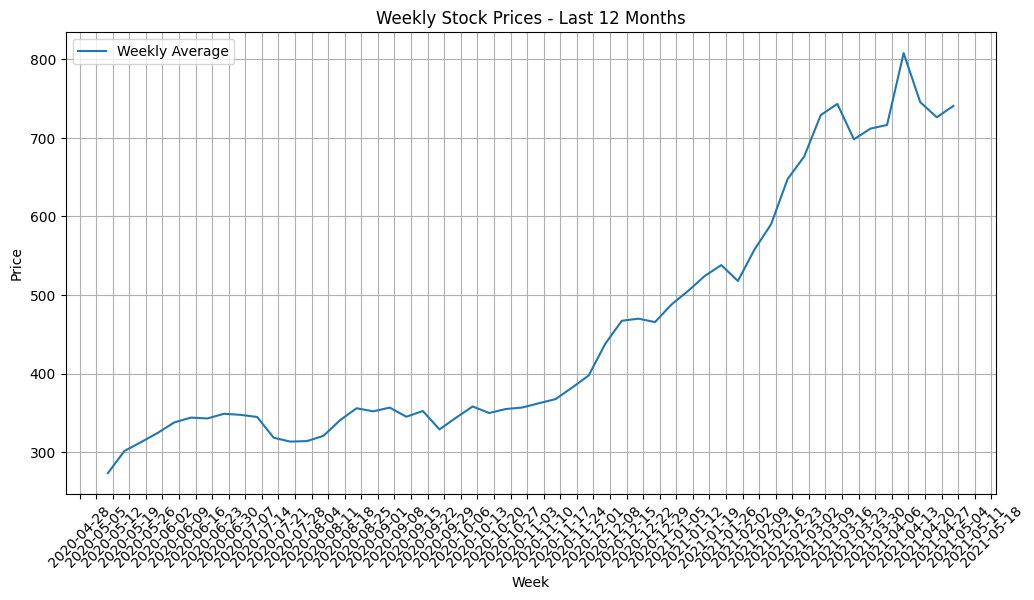

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data, label='Weekly Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()

<ipython-input-45-c444ed130066>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-45-c444ed130066>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')


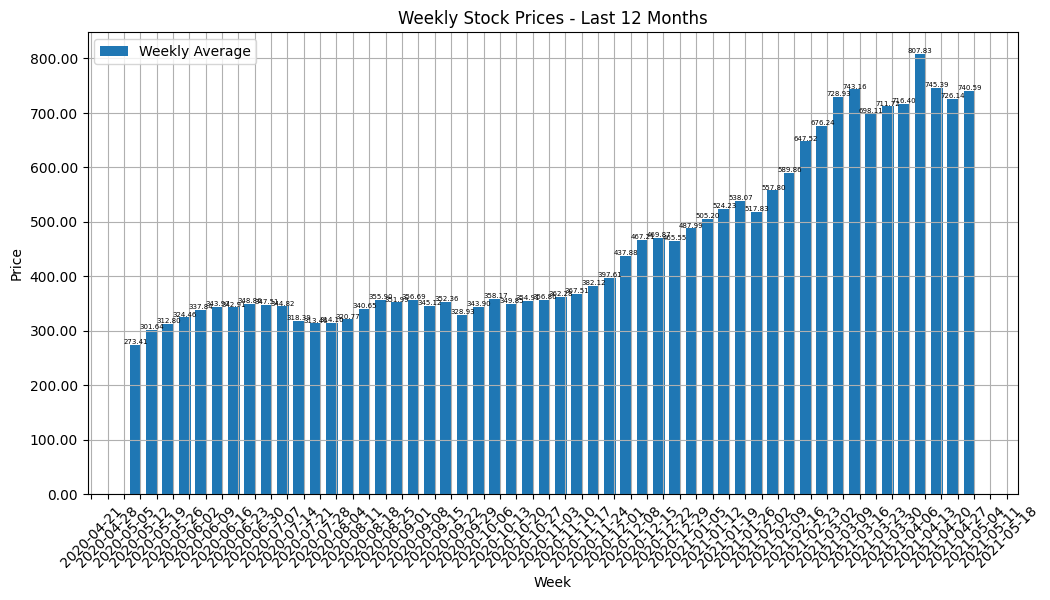

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 6 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

plt.figure(figsize=(12, 6))

# Create a bar graph
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (price)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-47-fc290295e4af>:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-47-fc290295e4af>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')


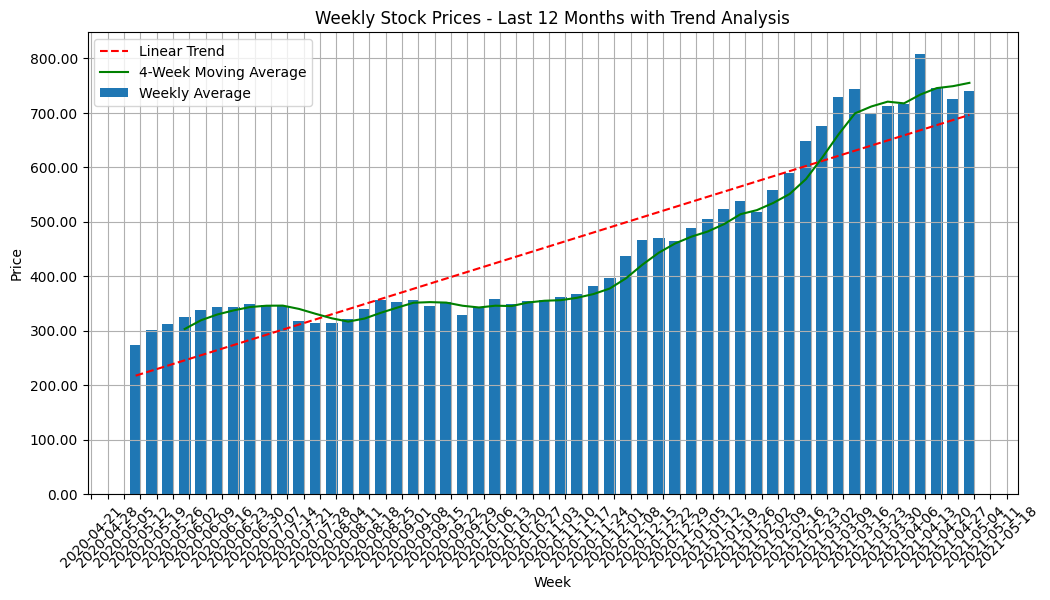

Trend Analysis Conclusion:
The stock price shows an upward trend over the last 12 months.
The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(weekly_data.index)  # Convert dates to numeric values for regression
y = weekly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = weekly_data.rolling(window=4).mean()  # 4-week moving average

plt.figure(figsize=(12, 6))

# Create a bar graph for weekly average
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Plot the trend line
plt.plot(weekly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(weekly_data.index, rolling_mean, color='green', label='4-Week Moving Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion
print("Trend Analysis Conclusion:")
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Assess the moving average trend
if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print("The 4-week moving average is trending upwards, indicating a recent positive momentum.")
elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
    print("The 4-week moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.")

<ipython-input-49-cc9479d589d5>:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-49-cc9479d589d5>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')


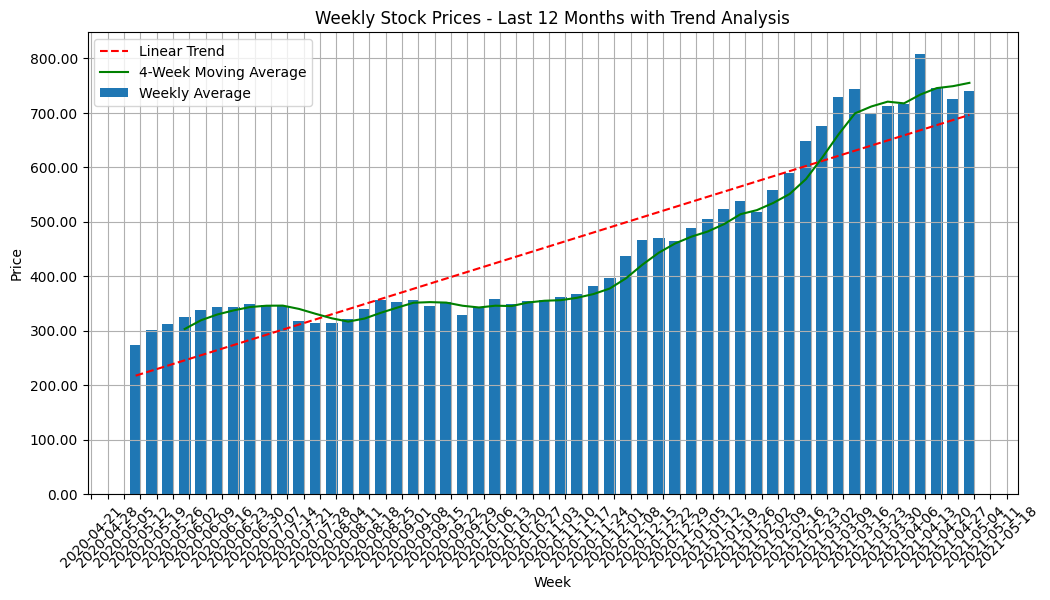

Trend Analysis Conclusion:
Slope of the Linear Trend: 1.3411
The stock price shows an upward trend over the last 12 months.
First value of the 4-week Moving Average: nan
Last value of the 4-week Moving Average: 754.99
The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by week and calculate the mean
weekly_data = df_filtered['Close'].resample('W').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(weekly_data.index)  # Convert dates to numeric values for regression
y = weekly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = weekly_data.rolling(window=4).mean()  # 4-week moving average

# Calculate the first and last values of the rolling mean for the analysis
first_rolling_mean = rolling_mean.iloc[0]
last_rolling_mean = rolling_mean.iloc[-1]

# Plotting (unchanged)
plt.figure(figsize=(12, 6))

# Create a bar graph for weekly average
bars = plt.bar(weekly_data.index, weekly_data, label='Weekly Average', width=5)

# Plot the trend line
plt.plot(weekly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(weekly_data.index, rolling_mean, color='green', label='4-Week Moving Average')

# Format the x-axis to show week labels
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())  # Set major ticks to every week
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format as 'YYYY-MM-DD'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=5)  # Reduced font size

# Add labels and title
plt.title('Weekly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Week')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion with numerical data
print("Trend Analysis Conclusion:")
print(f"Slope of the Linear Trend: {slope:.4f}")  # Print slope value
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Print the first and last values of the rolling mean (4-week moving average)
print(f"First value of the 4-week Moving Average: {first_rolling_mean:.2f}")
print(f"Last value of the 4-week Moving Average: {last_rolling_mean:.2f}")

# Assess the moving average trend based on first and last values
if last_rolling_mean > first_rolling_mean:
    print("The 4-week moving average is trending upwards, indicating a recent positive momentum.")
elif last_rolling_mean < first_rolling_mean:
    print("The 4-week moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 4-week moving average has remained flat, showing no significant momentum in the recent weeks.")

<ipython-input-43-a1c54f4aacc8>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-43-a1c54f4aacc8>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')
<ipython-input-43-a1c54f4aacc8>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_filtered['Close'].resample('M').mean()


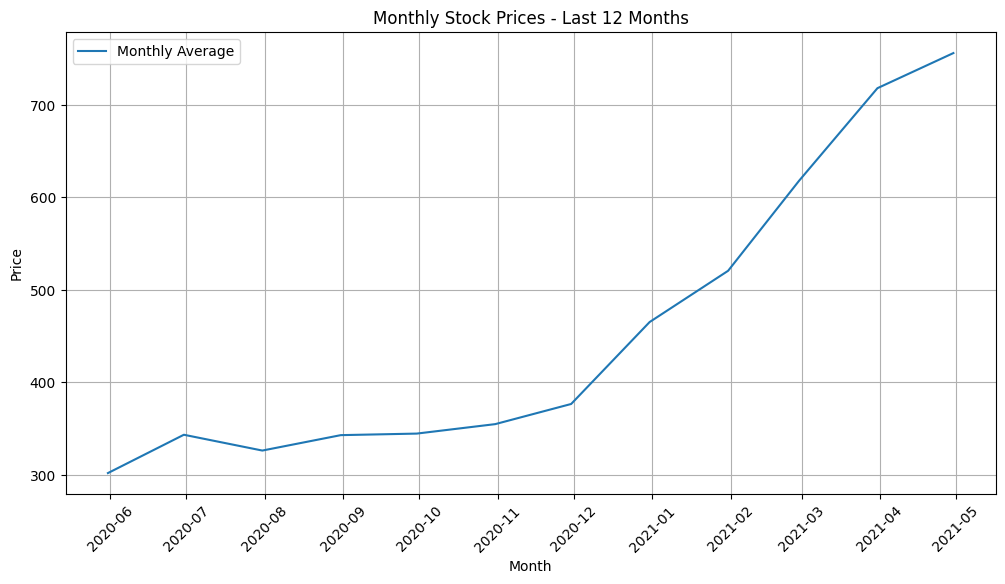

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))

# Create a line plot for monthly average prices
plt.plot(monthly_data.index, monthly_data, label='Monthly Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-53-9a8e5b885a2b>:6: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-53-9a8e5b885a2b>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')
<ipython-input-53-9a8e5b885a2b>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_filtered['Close'].resample('M').mean()


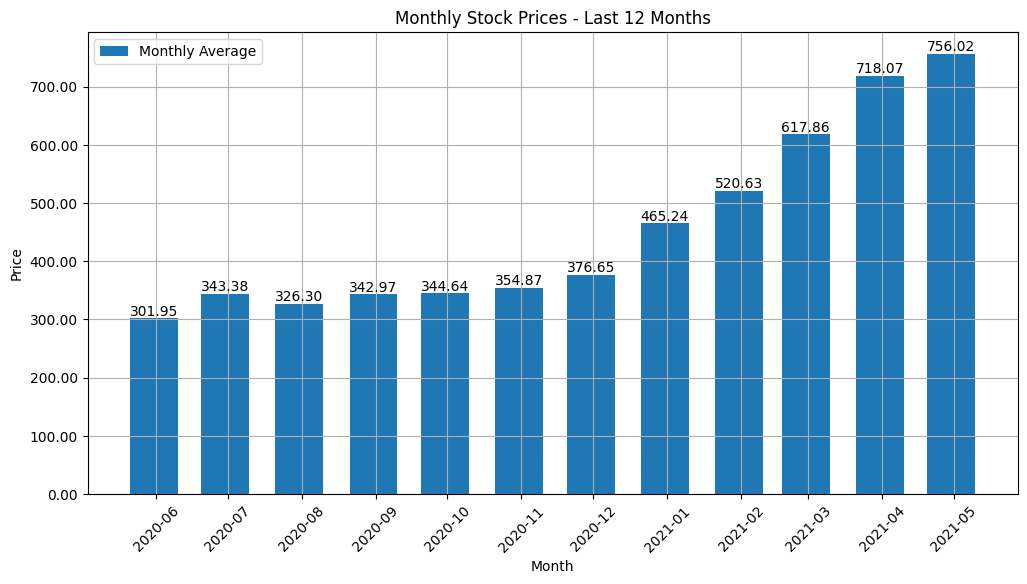

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

plt.figure(figsize=(12, 6))

# Create a bar graph
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
for bar in bars:
    yval = bar.get_height()  # Get the height of each bar (price)
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)  # Reduced font size

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<ipython-input-48-7ce2f355f66f>:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-48-7ce2f355f66f>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')
<ipython-input-48-7ce2f355f66f>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_filtered['Close'].resample('M').mean()


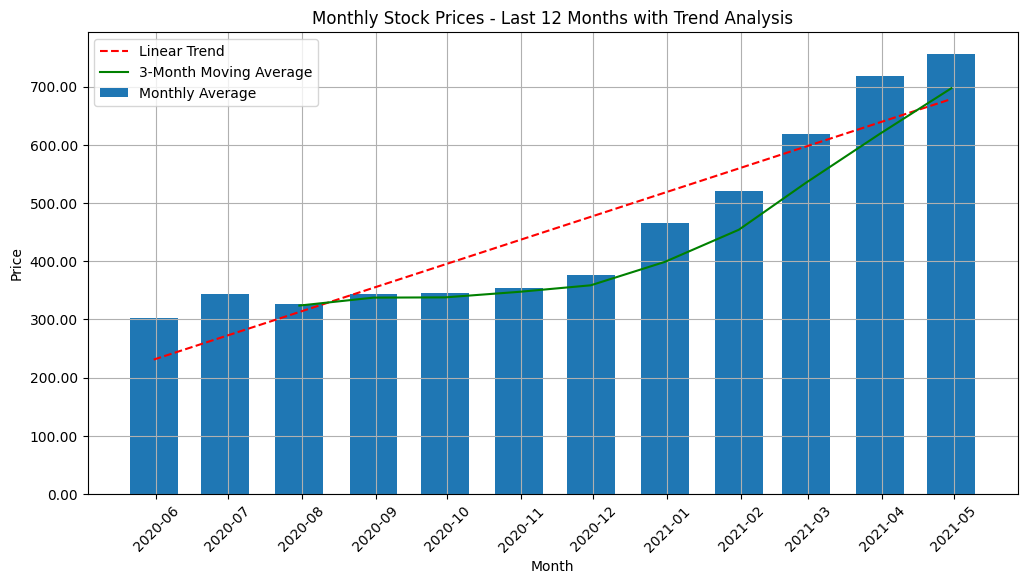

Trend Analysis Conclusion:
The stock price shows an upward trend over the last 12 months.
The 3-month moving average has remained flat, showing no significant momentum in the recent months.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(monthly_data.index)  # Convert dates to numeric values for regression
y = monthly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = monthly_data.rolling(window=3).mean()  # 3-month moving average

plt.figure(figsize=(12, 6))

# Create a bar graph for monthly average
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Plot the trend line
plt.plot(monthly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(monthly_data.index, rolling_mean, color='green', label='3-Month Moving Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add the exact price on top of each bar with a smaller text size
# for bar in bars:
#     yval = bar.get_height()  # Get the height of each bar (price)
#     plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)  # Reduced font size

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion
print("Trend Analysis Conclusion:")
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Assess the moving average trend
if rolling_mean.iloc[-1] > rolling_mean.iloc[0]:
    print("The 3-month moving average is trending upwards, indicating a recent positive momentum.")
elif rolling_mean.iloc[-1] < rolling_mean.iloc[0]:
    print("The 3-month moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 3-month moving average has remained flat, showing no significant momentum in the recent months.")

<ipython-input-50-1ab898442ac4>:7: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_filtered = df.last('12M')
<ipython-input-50-1ab898442ac4>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered = df.last('12M')
<ipython-input-50-1ab898442ac4>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_filtered['Close'].resample('M').mean()


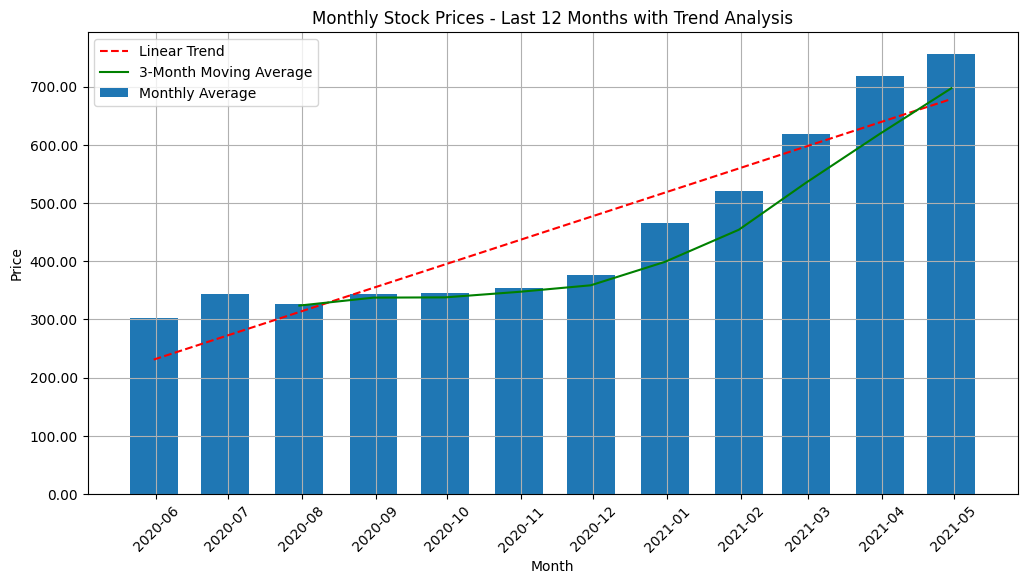

Trend Analysis Conclusion:
Slope of the Linear Trend: 1.3404
The stock price shows an upward trend over the last 12 months.
First value of the 3-month Moving Average: nan
Last value of the 3-month Moving Average: 697.32
The 3-month moving average has remained flat, showing no significant momentum in the recent months.


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Filter the data for the last 12 months
df_filtered = df.last('12M')

# Resample the filtered data by month and calculate the mean
monthly_data = df_filtered['Close'].resample('M').mean()

# Calculate the linear trend line (polynomial of degree 1)
x = mdates.date2num(monthly_data.index)  # Convert dates to numeric values for regression
y = monthly_data.values
slope, intercept = np.polyfit(x, y, 1)  # Fit a linear regression line
trend_line = slope * x + intercept  # Calculate the trend line

# Calculate the rolling mean (moving average)
rolling_mean = monthly_data.rolling(window=3).mean()  # 3-month moving average

# Calculate the first and last values of the rolling mean for analysis
first_rolling_mean = rolling_mean.iloc[0]
last_rolling_mean = rolling_mean.iloc[-1]

plt.figure(figsize=(12, 6))

# Create a bar graph for monthly average
bars = plt.bar(monthly_data.index, monthly_data, label='Monthly Average', width=20)  # Adjust width for monthly bars

# Plot the trend line
plt.plot(monthly_data.index, trend_line, color='red', label='Linear Trend', linestyle='--')

# Plot the moving average
plt.plot(monthly_data.index, rolling_mean, color='green', label='3-Month Moving Average')

# Format the x-axis to show month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as 'YYYY-MM'

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Make the y-axis labels more precise (2 decimal places)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.2f}'))

# Add labels and title
plt.title('Monthly Stock Prices - Last 12 Months with Trend Analysis')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Print the trend analysis conclusion with numerical data
print("Trend Analysis Conclusion:")
print(f"Slope of the Linear Trend: {slope:.4f}")  # Print slope value
if slope > 0:
    print("The stock price shows an upward trend over the last 12 months.")
elif slope < 0:
    print("The stock price shows a downward trend over the last 12 months.")
else:
    print("The stock price appears to have no clear upward or downward trend over the last 12 months.")

# Print the first and last values of the rolling mean (3-month moving average)
print(f"First value of the 3-month Moving Average: {first_rolling_mean:.2f}")
print(f"Last value of the 3-month Moving Average: {last_rolling_mean:.2f}")

# Assess the moving average trend based on first and last values
if last_rolling_mean > first_rolling_mean:
    print("The 3-month moving average is trending upwards, indicating a recent positive momentum.")
elif last_rolling_mean < first_rolling_mean:
    print("The 3-month moving average is trending downwards, indicating a recent negative momentum.")
else:
    print("The 3-month moving average has remained flat, showing no significant momentum in the recent months.")

In [56]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [57]:
!git config --global user.name "championorwhat"
!git config --global user.email "iampratibimb07rc@gmail.com"


In [58]:
!git clone https://github.com/championorwhat/StockMarketPredictionTool.git

Cloning into 'StockMarketPredictionTool'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 2), reused 49 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (64/64), 20.56 MiB | 13.32 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [67]:
!ls /content/drive/MyDrive
!find /content/drive/MyDrive -name "AdaniPortsAnalysis.ipynb"


'Colab Notebooks'  'Collab Dataset'  'NIFTY 50'
/content/drive/MyDrive/Colab Notebooks/AdaniPortsAnalysis.ipynb


In [68]:
import shutil
import os

# Define the source and destination paths
source_file = "/content/drive/MyDrive/Colab Notebooks/AdaniPortsAnalysis.ipynb"
destination_folder = "/content/StockMarketPredictionTool"

# Check if the destination folder exists; if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Check if the source file exists
if os.path.exists(source_file):
    # Move the file
    shutil.move(source_file, destination_folder)
    print(f"File '{source_file}' moved to '{destination_folder}' successfully.")
else:
    print(f"Error: Source file '{source_file}' not found.")


Error: Destination path '/content/StockMarketPredictionTool/AdaniPortsAnalysis.ipynb' already exists

In [62]:
%cd YourExistingRepo/


[Errno 2] No such file or directory: 'YourExistingRepo/'
/content
